In [161]:
# import neccessary libraries
from numpy import loadtxt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

%matplotlib inline

In [162]:
# download diabetes datasest and its description
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names"

--2023-09-24 15:42:28--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv.10’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2023-09-24 15:42:28 (23.5 MB/s) - ‘pima-indians-diabetes.data.csv.10’ saved [23278/23278]

--2023-09-24 15:42:28--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, aw

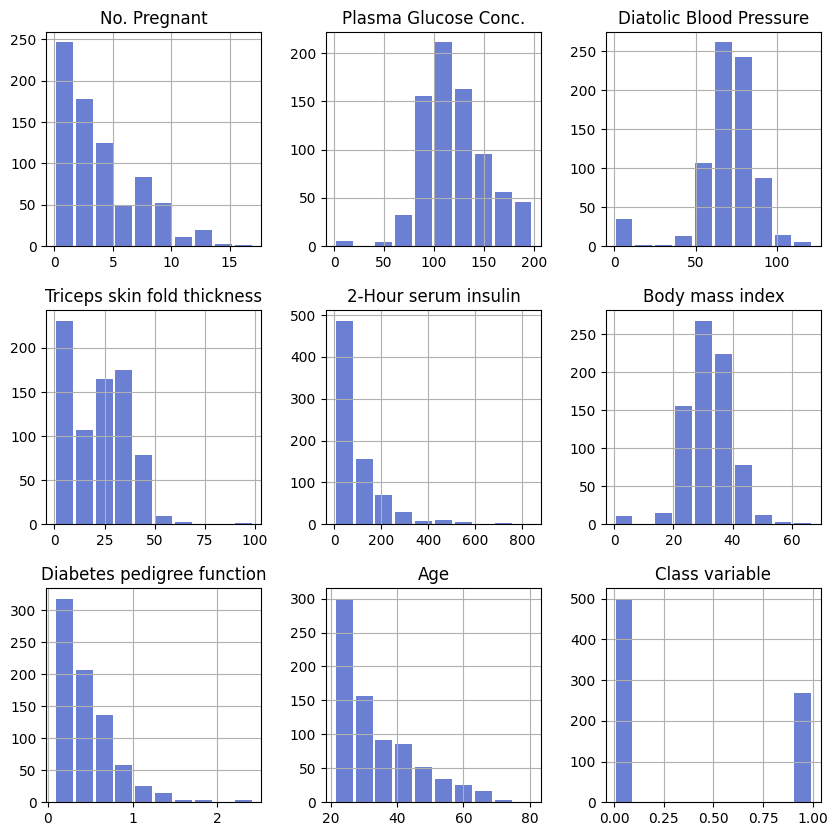

In [163]:
df = pd.read_csv('pima-indians-diabetes.data.csv', names=["No. Pregnant","Plasma Glucose Conc.","Diatolic Blood Pressure","Triceps skin fold thickness","2-Hour serum insulin","Body mass index","Diabetes pedigree function","Age","Class variable"])
fig=df.hist(figsize = (10,10), color='#2D4ABF',alpha=0.7, rwidth=0.85)

<Axes: >

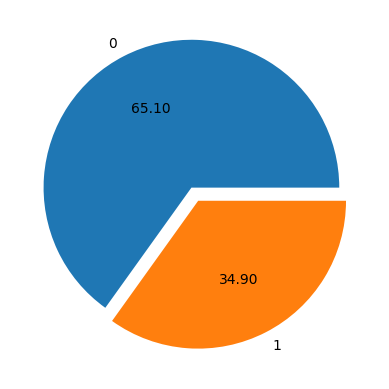

In [164]:
df.groupby(['Class variable']).size().plot(kind='pie', autopct='%.2f', explode = (0.05, 0.05))

In [165]:
# Data Preprocessing
df_cut = df.drop(['Class variable', 'No. Pregnant'], axis=1)[df[0:768] > 0]
df_classVariable = df.loc[:,'Class variable']
df_noPregnant = df.loc[:,'No. Pregnant']
df = df_cut.dropna()
df = df.assign(Num_Pregnant = df_noPregnant)
df = df.assign(Class_Variable = df_classVariable)

In [166]:
# df = df.sample(frac=1)

,Plasma Glucose Conc.,Diatolic Blood Pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Num_Pregnant,Class_Variable
3,89.0,66.0,23.0,94.0,28.1,0.167,21,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1
6,78.0,50.0,32.0,88.0,31.0,0.248,26,3,1
8,197.0,70.0,45.0,543.0,30.5,0.158,53,2,1
13,189.0,60.0,23.0,846.0,30.1,0.398,59,1,1
...,...,...,...,...,...,...,...,...,...
753,181.0,88.0,44.0,510.0,43.3,0.222,26,0,1
755,128.0,88.0,39.0,110.0,36.5,1.057,37,1,1
760,88.0,58.0,26.0,16.0,28.4,0.766,22,2,0
763,101.0,76.0,48.0,180.0,32.9,0.171,63,10,0


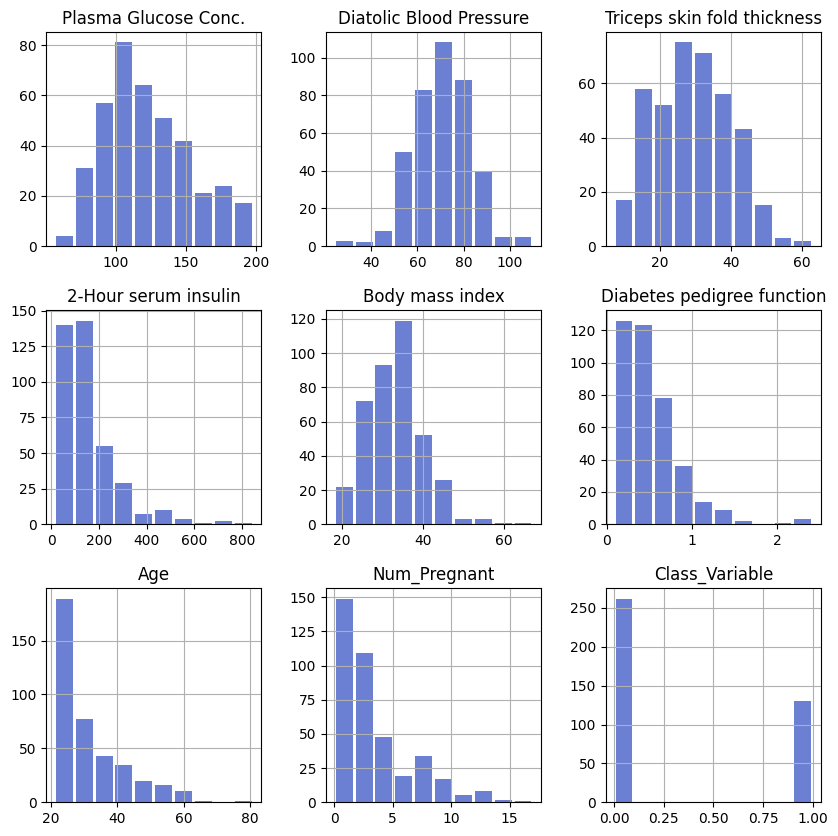

In [167]:
dataset = df
X = dataset.drop('Class_Variable', axis=1).values
y = dataset['Class_Variable'].values
fig=df.hist(figsize = (10,10), color='#2D4ABF',alpha=0.7, rwidth=0.85)
dataset

In [168]:
def distplot(col_name):

    plt.figure()
    sns.set(style="whitegrid")
    ax = sns.distplot(df[col_name][df.Class_Variable == 1], color ="gold", rug = True)
    sns.distplot(df[col_name][df.Class_Variable == 0], color ="#FF0000",rug = True)
    plt.legend(['Diabetic', 'Healthy'])

In [169]:
# distplot('Plasma Glucose Conc.')

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
model = keras.Sequential([
    keras.layers.Dense(16, input_dim=8, activation='relu',
    kernel_regularizer=regularizers.L2(1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation='relu',
    kernel_regularizer=regularizers.L2(1e-4)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1, activation='sigmoid')
    ])

In [172]:
optimizer = keras.optimizers.AdamW()

In [173]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)

In [174]:
# Naive Bayes
# nb =  GaussianNB()
# nb.fit(X_train, y_train)
# nb_predict=nb.predict(X_test)

# Decision Tree
# dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = 15)
# dtree.fit(X_train, y_train)
# nb_predict=dtree.predict(X_test)

# Random Forest
# rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = 30)
# rfm.fit(X_train, y_train)
# nb_predict=rfm.predict(X_test)

# KNN
# knn = KNeighborsClassifier(n_neighbors=15)
# knn.fit(X_train,y_train)
# nb_predict=knn.predict(X_test)

# print(metrics.classification_report(y_test, nb_predict))
# accuracy = metrics.accuracy_score(y_test, nb_predict)
# average_accuracy = np.mean(y_test == nb_predict) * 100
# print("The average accuracy is {0:.1f}%".format(average_accuracy))

# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(X_train, y_train)

# fit the keras model on the dataset

hist = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=10,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/150
32/32 [==============================] - 2s 9ms/step - loss: 0.6641 - accuracy: 0.6486 - val_loss: 0.6011 - val_accuracy: 0.6582
Epoch 2/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.6262 - val_loss: 0.5779 - val_accuracy: 0.7089
Epoch 3/150
32/32 [==============================] - 0s 4ms/step - loss: 0.5822 - accuracy: 0.7093 - val_loss: 0.5525 - val_accuracy: 0.7342
Epoch 4/150
32/32 [==============================] - 0s 5ms/step - loss: 0.5887 - accuracy: 0.6901 - val_loss: 0.5309 - val_accuracy: 0.7215
Epoch 5/150
32/32 [==============================] - 0s 6ms/step - loss: 0.5340 - accuracy: 0.7252 - val_loss: 0.5115 - val_accuracy: 0.7595
Epoch 6/150
32/32 [==============================] - 0s 6ms/step - loss: 0.5353 - accuracy: 0.7284 - val_loss: 0.4949 - val_accuracy: 0.7468
Epoch 7/150
32/32 [==============================] - 0s 5ms/step - loss: 0.5362 - accuracy: 0.7061 - val_loss: 0.4865 - val_accuracy: 0.7595
Epoch 8/150
3

Accuracy:  0.8101266026496887


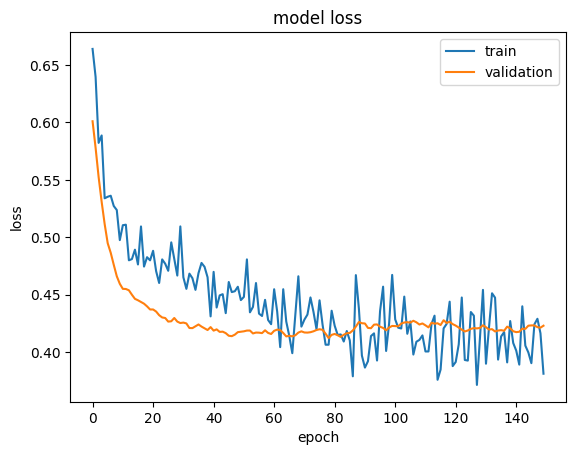

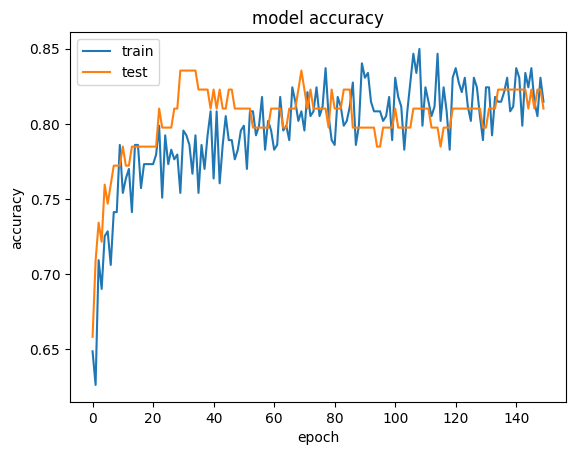

In [175]:
_, score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [176]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


13/13 [==============================] - 0s 2ms/step
[89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 1.0] 	=> 1 (expected 0)
[137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 0.0] 	=> 1 (expected 1)
[78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0, 3.0] 	=> 1 (expected 1)
[197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0, 2.0] 	=> 0 (expected 1)
[189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0, 1.0] 	=> 0 (expected 1)
[166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0, 5.0] 	=> 1 (expected 1)
[118.0, 84.0, 47.0, 230.0, 45.8, 0.551, 31.0, 0.0] 	=> 1 (expected 1)
[103.0, 30.0, 38.0, 83.0, 43.3, 0.183, 33.0, 1.0] 	=> 1 (expected 0)
[115.0, 70.0, 30.0, 96.0, 34.6, 0.529, 32.0, 1.0] 	=> 1 (expected 1)
[126.0, 88.0, 41.0, 235.0, 39.3, 0.704, 27.0, 3.0] 	=> 1 (expected 0)
